# Utilizando a biblioteca Shapely para modelagem espacial dos dados

## 1. Bibliotecas que serão utilizadas
Os objetos geométricos fundamentais para trabalhar com os dados espaciais são: `Points`, `Lines` e `Polygons`. Em python, podemos utilizar da biblioteca `Shapely` para definir e realizar operações com os objetos geométricos.

In [2]:
# Importando os objetos geométricos da biblioteca Shapely
from shapely.geometry import Point, LineString, Polygon

In [3]:
# Criando uma geometria do tipo ponto
ponto = Point(5, 10)

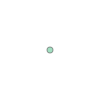

In [6]:
ponto

In [7]:
print(ponto)

POINT (5 10)


In [5]:
type(ponto)

shapely.geometry.point.Point

### *Ponto - Atributos e funções*

Os objetos do tipo `Point` já possuem atributos e funções internas para realizar operações básicas. Uma das funções mais simples é a capacidade de extrair as coordenadas e a possibilidade de calcular a distância entre dois pontos.

Podemos obter as coordenadas x e y de diferentes maneiras:

In [9]:
# Utilizando a função coords
list(ponto.coords)

[(5.0, 10.0)]

In [10]:
# Lendo x e y separadamente
x = ponto.x
y = ponto.y

print(x, y)

5.0 10.0


In [11]:
# Calculando a distância entre dois pontos
ponto1 = Point(2,3)
ponto2 = Point(5,7)

distancia = ponto1.distance(ponto2)

print("Dinstância entre os pontos: ", distancia)

Dinstância entre os pontos:  5.0


### *Linha (LineString)*

Criar um objeto `LineString` é similar a criação de um objeto `Point`.

Agora, em vez de utilizar uma única tupla de coordenadas, podemos construir uma linha utilizando uma lista de `Point` ou um vetor de tuplas com as respectivas coordenadas:

In [12]:
# Criando uma linha a partir de objetos pontos
ponto1 = Point(2,3)
ponto2 = Point(5,7)
ponto3 = Point(2,10)

linha = LineString([ponto1, ponto2, ponto3])

Vamos ver como a variável do tipo `LineString` é mostrada no jupyter:

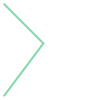

In [13]:
linha

Vamos imprimir e ver o tipo do objeto para ver a sua definição:

In [14]:
print(linha)

LINESTRING (2 3, 5 7, 2 10)


In [15]:
type(linha)

shapely.geometry.linestring.LineString

### *Linha - Atributos e funções*

O objeto `LineString` possui diversos atributos e funções internas. Algumas operações possíveis com o objeto do tipo linha:
- Extrair as coordenadas;
- Calcular o tamanho da linha;
- Calcular o ponto médio (centróide).

In [16]:
# Utilizando a função coords
list(linha.coords)

[(2.0, 3.0), (5.0, 7.0), (2.0, 10.0)]

In [18]:
# Lendo x e y separadamente
coordenadas_x = list(linha.xy[0])
coordenadas_y = list(linha.xy[1])

print("Coordenadas x: ", coordenadas_x)
print("Coordenadas y: ", coordenadas_y)

Coordenadas x:  [2.0, 5.0, 2.0]
Coordenadas y:  [3.0, 7.0, 10.0]


In [19]:
# Ler o comprimento da linha
linha.length

9.242640687119284

In [21]:
# Obtendo o ponto central (centróide)
print(linha.centroid)

POINT (3.5 6.606601717798214)


### *Polígono (Polygon)*

Podemos criar um objeto `Polygon` usando a mesma lógica do `Point` e `LineString`, porém a criação do objeto `Polygon` só aceita uma sequência de coordenadas.

Para criar um polígono, são necessárias **pelo menos três coordenadas**

In [23]:
# Criando um Polygon passando as coordenadas
poly = Polygon([(2,3), (5,7), (2, 10)])

Vamos ver como a variável do tipo `Polygon` é mostrada no jupyter:

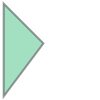

In [24]:
poly

Vamos imprimir e ver o tipo do objeto e ver a sua definição:

In [25]:
print(poly)

POLYGON ((2 3, 5 7, 2 10, 2 3))


In [26]:
type(poly)

shapely.geometry.polygon.Polygon

### *Polígonos - Atributos e funções*

Podemos acessar diferentes funções diretamente do objeto `Polygon`, que são úteis para muitas tarefas e análises, como: obter área, centróide, *bounding box*, o exterior e o perímetro (tamanho exterior).

In [28]:
# Obtendo as coordenadas do polígono
list(poly.exterior.coords)

[(2.0, 3.0), (5.0, 7.0), (2.0, 10.0), (2.0, 3.0)]

In [29]:
# Calculando a área
poly_area = poly.area

print("Área: ", poly_area)

Área:  10.5


In [30]:
# Obtendo o centróide do polígono
poly_centroid = poly.centroid

print("Centróide: ", poly_centroid)

Centróide:  POINT (3 6.666666666666667)


In [31]:
# Obtendo as coordenadas do bounding box
poly.bounds

(2.0, 3.0, 5.0, 10.0)

In [33]:
# Obtendo as coordenadas da linha exterior
poly_exterior = poly.exterior

print("Exterior: ", poly_exterior)

Exterior:  LINEARRING (2 3, 5 7, 2 10, 2 3)


In [35]:
# Obtendo o tamanho da linha exterior
poly_exterior_lenght = poly.exterior.length

print("Comprimento exterior: ", poly_exterior_lenght)

Comprimento exterior:  16.242640687119284


## 2. Operações básicas entre geometrias

In [38]:
# Criando dois círculos
circulo1 = Point(1,1).buffer(1)
circulo2 = Point(2,1).buffer(1)

type(circulo2)

shapely.geometry.polygon.Polygon

Vamos mostrar os dois círculos utilizando a biblioteca `matplotlib`.

In [39]:
# Importando a blblioteca matplotlib
import matplotlib.pyplot as plt

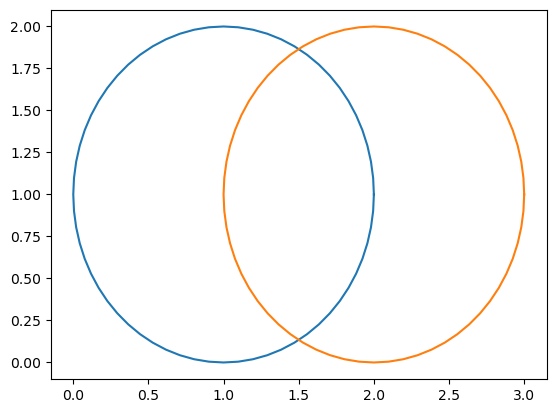

In [41]:
# Plotar o círculo 1
x, y = circulo1.exterior.xy
plt.plot(x,y)

x, y = circulo2.exterior.xy
plt.plot(x,y)

plt.show()

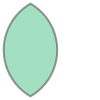

In [42]:
# Operação de interseção
circulo_inter = circulo1.intersection(circulo2)

circulo_inter

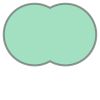

In [43]:
#Operação de união
circulo_union = circulo1.union(circulo2)

circulo_union

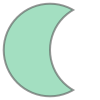

In [44]:
# Operação de diferença
circulo_diff_1 = circulo1.difference(circulo2)

circulo_diff_1

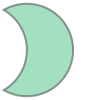

In [45]:
circulo_diff_2 = circulo2.difference(circulo1)
circulo_diff_2

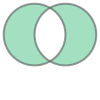

In [46]:
# Operação de diferença simétrica
circulo_diffsim = circulo1.symmetric_difference(circulo2)

circulo_diffsim